### Práctica de Formatos de datos: XML

El objetivo de esta práctica es crear una aplicación que gestionará información sobre los alojamientos de la ciudad de Madrid incluyendo hoteles, hostales, pensiones y campings. 

Para ello se va a usar el catálogo "Alojamientos de la ciudad de Madrid" del portal de datos abiertos del Ayuntamiento de Madrid. La información incluye los datos básicos de cada punto, una descripción, su geoposición y dirección postal, así como un conjunto de fotografías relativas a cada punto. En los casos en los que aplica, se ofrecen horarios de apertura y costes de acceso si los tuviera. La información se encuentra en:
https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=df42a73970504510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

Y el conjunto de datos XML que hay que procesar está situado en:
https://datos.madrid.es/egob/catalogo/300032-10037102-turismo-alojamientos.xml

Junto al enunciado de la práctica se proporciona el fichero xml a tratar. El siguiente trozo de código permite recuperar el archivo xml en cuestion, y mostrar su contenido.

In [1]:
from xml.etree import ElementTree
from xml.dom import minidom
def prettify(elem):
    """Return a pretty-printed XML string for the Element."""
    rough_string=ElementTree.tostring(elem,"utf-8")
    reparsed=minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")

f=open("alojamientos_v1_es.xml","rt",encoding="utf8")
arbol=ElementTree.parse(f)
raiz=arbol.getroot()
print (prettify(raiz))

<?xml version="1.0" ?>
<serviceList>
  <service fechaActualizacion="2021-09-27" id="97833">
    <basicData>
      <language>es</language>
      <name>Oxygen Hostel</name>
      <email>oxygenmadrid19@gmail.com</email>
      <phone>+34 686 81 12 61</phone>
      <fax/>
      <title>Oxygen Hostel</title>
      <body>&lt;p&gt;&lt;strong&gt;En una inmejorable situación, muy cerca de Atocha y del Paseo del Arte, se encuentra este hotel cápsula, el primero en ofrecer un estilo&amp;nbsp;de alojamiento&amp;nbsp;futurista y &lt;em&gt;low cost &lt;/em&gt;en Madrid.&lt;/strong&gt;&lt;/p&gt;&lt;p&gt;Disponen de 22 cápsulas, 10 dobles y 12 sencillas, todas equipadas con baños individuales independientes, aire acondicionado y WiFi. Además, ofrecen la posibilidad de trabajar en ellas.&lt;/p&gt;&lt;p&gt;Cuentan con dos zonas comunes, salón y cocina, recepción 24 horas y organizan excursiones.No admiten mascotas.&lt;/p&gt;</body>
      <web>http://www.esmadrid.com/alojamientos/oxygen-hostel</web>
    </

__Ejercicio 1 [5 puntos]__

Se pide mostrar al usuario un listado de los nombres de los alojamientos que contiene el archivo con el objetivo de que elija un alojamiento y se le muestre de forma amigable(sin etiquetas) por pantalla la información asociada al alojamiento que se encuentra en el fichero recuperado:

* Nombre del alojamiento: etiqueta name
* Email: etiqueta email
* Teléfono: etiqueta phone
* Descripción: etiqueta body
* Página web: etiqueta web
* Dirección: etiqueta address, etiqueta zipcode, etiqueta locality


A continuación se le pedira si quiere ver fotos del alojamiento, en tal caso se le mostrarán las fotos recuperadas del alojamiento. Para mostrar las imagenes puedes usar un trozo de código similar al siguiente.

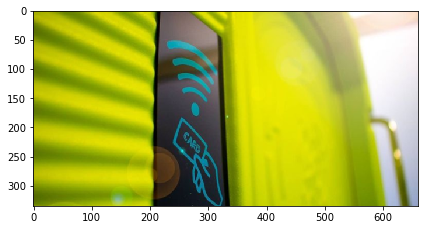

In [25]:
img_src = 'http://www.esmadrid.com/sites/default/files/recursosturisticos/alojamientos/oxigen_hostle.png'
from skimage import io
image = io.imread(img_src)
io.imshow(image)
io.show()

Observar:
  * Algunas etiquetas podrían estar vacías o no aparecer. En estos casos, simplemente se mostrará vacío o con la palabra "Desconocido".
  * Hay que limpiar el texto de la descripción eliminando los símbolos especiales del tipo "&lt;/p&gt;&lt;p&gt;" que aparecen en el mismo.

Por ejemplo si el usuario hubiera elegido el alojamiento "Oxygen Hostel" debería mostrarse por pantalla:

__Nombre del alojamiento:__

Oxygen Hostel
    
__Descripción:__

En una inmejorable situación, muy cerca de Atocha y del Paseo del Arte, se encuentra este hotel cápsula, el primero en ofrecer un estilo de alojamiento futurista y low cost en Madrid.Disponen de 22 cápsulas, 10 dobles y 12 sencillas, todas equipadas con baños individuales independientes, aire acondicionado y WiFi. Además, ofrecen la posibilidad de trabajar en ellas.Cuentan con dos zonas comunes, salón y cocina, recepción 24 horas y organizan excursiones.No admiten mascotas.

__Página web:__

http://www.esmadrid.com/alojamientos/oxygen-hostel
    
__Email:__

oxygenmadrid19@gmail.com
    
__Teléfono:__

+34 686 81 12 61

__Localización:__ 

Rafael Riego, 19. Madrid 28045


__Solución__

In [114]:
from os import system, name
from xml.etree import ElementTree
from xml.dom import minidom
import html
import re
from skimage import io

def prettify(elem):
    """Return a pretty-printed XML string for the Element."""
    rough_string=ElementTree.tostring(elem,"utf-8")
    reparsed=minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")

CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

def clear():
  
    # for windows
    if name == 'nt':
        _ = system('cls')
  
    # for mac and linux(here, os.name is 'posix')
    else:
        _ = system('clear')

f=open("alojamientos_v1_es.xml","rt",encoding="utf8")
arbol=ElementTree.parse(f)

Matplotlib is building the font cache; this may take a moment.


In [131]:
#Devuelve una lista con el nombre de los alojamientos
def get_ListAlojamientos():
    alojamientosList = list()
    for nodo in arbol.iter("name"):
        alojamientosList.append(html.unescape(nodo.text))
    return alojamientosList


# Devuelve la info asocciada al nombre de un alojamiento
# Nombre del alojamiento: etiqueta name
# Email: etiqueta email
# Teléfono: etiqueta phone
# Descripción: etiqueta body
# Página web: etiqueta web
# Dirección: etiqueta address, etiqueta zipcode, etiqueta locality
def get_Info(alojamiento, root):
    full_info=[]
    for i in range(len(root)):
        if html.unescape(root[i][0][1].text) in alojamiento:
            try : # Comprobar si tiene atributo estrellas
                stars=html.unescape(str(root[i][3][2][0][2][0][1].text))
            except:
                stars="None"
            try:
                categoria=html.unescape(str(root[i][3][2][0][1].text))
            except:
                categoria="None"
            
            # Solo limpiamos el html de los campos que sean caracteres, no numeros
            # Usamos str() para encapsular aquellas etiquetas vacias y usar el string None que devuelve
            dicty = {
                "name": html.unescape(str(root[i][0][1].text)),
                "email": html.unescape(str(root[i][0][2].text)),
                "estrellas": stars,
                "tipo": html.unescape(str(root[i][3][1].text)),
                "categoria": categoria,
                "telefono": str(root[i][0][3].text),
                "descripcion": cleanhtml(html.unescape(str(root[i][0][6].text))),
                "web": html.unescape(str(root[i][0][7].text)),
                "address": html.unescape(str(root[i][1][0].text)),
                "zipcode": str(root[i][1][1].text),
                "locality": html.unescape(str(root[i][1][2].text)),
                "latitude": str(root[i][1][4].text),
                "longitude": str(root[i][1][5].text)
            }
            
            multimedia = list()
            for img in root[i][2]:
                multimedia.append(html.unescape(str(img[1].text)))
                
            full_info = [dicty, multimedia]
            i = len(root) # end loop
            
    return full_info

# Muestra por pantalla la info asociada a un establecimiento
def print_info(alojamiento):
    # Imprimir la info básica
    print('\033[1m'+"Nombre del alojamiento:\n"+'\033[0m')
    print(alojamiento[0]["name"] + "\n")
    print('\033[1m'+"Descripción:\n"+'\033[0m')
    print(alojamiento[0]["descripcion"] + "\n")
    print('\033[1m'+"Página web:\n"+'\033[0m')
    print(alojamiento[0]["web"] + "\n")
    print('\033[1m'+"Email:\n"+'\033[0m')
    print(alojamiento[0]["email"] + "\n")
    print('\033[1m'+"Teléfono:\n"+'\033[0m')
    print(alojamiento[0]["telefono"] + "\n")
    print('\033[1m'+"Localización:\n"+'\033[0m')
    print(alojamiento[0]["address"]+".",alojamiento[0]["locality"],alojamiento[0]["zipcode"] + "\n")
    
    # Imprimir multimedia en demanda
    select = input("¿Desea ver fotos del establecimiento? (s/n): ").lower()
    if select == "s":
        for img_src in alojamiento[1]:
            image = io.imread(img_src)
            io.imshow(image)
            io.show()

# Imprime una lista con los nombres de los hoteles
def print_alojamientos(lista_alojamientos):
    i = 1
    for kelo in lista_alojamientos:
        print(i, "-", kelo)
        i += 1

# [service][basicData/geodata/multimedia/extradata][nombres...]

1 - Oxygen Hostel
2 - Canopy by Hilton Madrid Castellana 
3 - Atocha Hotel Madrid, Tapestry Collection by Hilton
4 - Hard Rock Hotel Madrid
5 - Hotel Novotel Madrid City Las Ventas 
6 - Pestana CR7 Gran Vía Madrid
7 - Four Seasons Hotel Madrid
8 - Apartahotel Las Matas Tartesos
9 - Hotel Las Gacelas
10 - Apartamentos Plaza de Santiago
11 - Apartahotel TH Las Rozas
12 - Apartamentos Suites Florida
13 - Apartamentos Suites Aeropuerto
14 - Tryp Madrid Airport Suites
15 -  Room Mate Macarena
16 - Hotel Riu Plaza España
17 - Bluesock Madrid
18 - Aloft Gran Vía Madrid
19 - Pestana Plaza Mayor
20 - B&B Hotel Madrid Centro Puerta del Sol
21 - CoolRooms Atocha
22 - Heritage Madrid Hotel
23 - Generator Hostel Madrid
24 - Hotel Icon Casona 1900 by Petit Palace
25 - Poshtel LaNave
26 - NH Collection Madrid Gran Vía
27 - Barceló Imagine
28 - Plaza España Skyline by Bemate
29 - Gran Hotel Inglés
30 - VP Plaza España Design
31 - Hotel Dome Madrid
32 - Vitium Urban Suites
33 - Bungalows Camping Alpha 

603 - AC Carlton
604 - Catalonia Goya
605 - Catalonia Las Cortes
606 - Catalonia Puerta del Sol
607 - Ayre Gran Hotel Colón
608 - Catalonia Gran Vía
609 - Sercotel Madrid Aeropuerto
610 - Sercotel Gran Hotel Conde Duque
611 - Bless Hotel Madrid
612 - H10 Villa de la Reina
613 - Petit Palace Arturo Soria
614 - Holiday Inn Madrid - Las Tablas
615 - Abba Madrid
616 - Petit Palace President Castellana
617 - Madrid Marriott Auditorium
618 - Hotel Occidental Madrid Este
619 - Ilunion Hotels Alcalá Norte 
620 - Ilunion Pío XII
621 - NH Collection Madrid Paseo del Prado
622 - Hotel Santo Mauro, Autograph Collection 
623 - Hotel Palacio del Retiro, Autograph Collection
624 - Monte Real
625 - Hyatt Regency Hesperia Madrid
626 - Eurostars Suites Mirasierra
627 - Gran Meliá Fénix
628 - Hotel Wellington
629 - AC Aitana
630 - Meliá Madrid Princesa
631 - Meliá Castilla
632 - InterContinental Madrid
633 - Princesa Plaza Madrid
634 - Orfila
635 - Mandarin Oriental Ritz
636 - Hotel Miguel Ángel
637 - Th

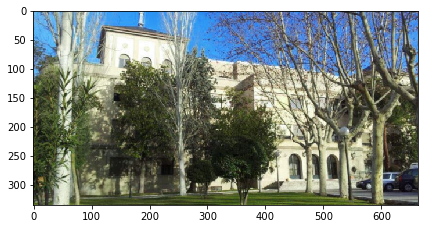

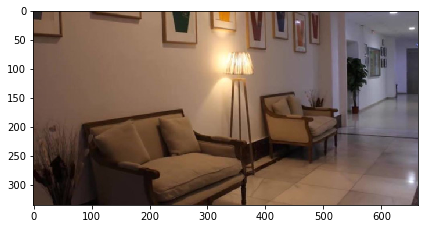

¿Desea ver más alojamientos? (s/n): s
1 - Oxygen Hostel
2 - Canopy by Hilton Madrid Castellana 
3 - Atocha Hotel Madrid, Tapestry Collection by Hilton
4 - Hard Rock Hotel Madrid
5 - Hotel Novotel Madrid City Las Ventas 
6 - Pestana CR7 Gran Vía Madrid
7 - Four Seasons Hotel Madrid
8 - Apartahotel Las Matas Tartesos
9 - Hotel Las Gacelas
10 - Apartamentos Plaza de Santiago
11 - Apartahotel TH Las Rozas
12 - Apartamentos Suites Florida
13 - Apartamentos Suites Aeropuerto
14 - Tryp Madrid Airport Suites
15 -  Room Mate Macarena
16 - Hotel Riu Plaza España
17 - Bluesock Madrid
18 - Aloft Gran Vía Madrid
19 - Pestana Plaza Mayor
20 - B&B Hotel Madrid Centro Puerta del Sol
21 - CoolRooms Atocha
22 - Heritage Madrid Hotel
23 - Generator Hostel Madrid
24 - Hotel Icon Casona 1900 by Petit Palace
25 - Poshtel LaNave
26 - NH Collection Madrid Gran Vía
27 - Barceló Imagine
28 - Plaza España Skyline by Bemate
29 - Gran Hotel Inglés
30 - VP Plaza España Design
31 - Hotel Dome Madrid
32 - Vitium Urba

541 - Don Pío
542 - Sercotel Eurobuilding 2
543 - Hotel City House Florida Norte
544 - NYX Madrid
545 - Gran Versalles
546 - VP Jardín de Recoletos
547 - Zenit Abeba
548 - Hotel Meninas
549 - Hotel Via Castellana
550 - Rafael Hoteles Atocha
551 - TRYP Madrid Atocha
552 - H10 Tribeca
553 - Petit Palace Plaza del Carmen
554 - Vincci Centrum Madrid
555 - Vincci Capitol
556 - Innside Madrid Gran Vía
557 - Gran Meliá Palacio de los Duques
558 - Mercure Madrid Plaza de España
559 - Pullman Madrid Airport & Feria
560 - Silken Puerta Madrid
561 - Exe Puerta Castilla
562 - Siete Islas Hotel
563 - Senator Gran Vía 70 Spa
564 - Quatro Puerta del Sol
565 - Praga
566 - Petit Palace Plaza de España
567 - Petit Palace Posada del Peine
568 - Meliá Madrid Serrano
569 - NH Collection Madrid Abascal
570 - H10 Puerta de Alcalá
571 - Petit Palace Alcalá Torre
572 - Icon Wipton by Petit Palace
573 - Palacio de San Martín
574 - NH La Habana
575 - Nuevo Madrid
576 - Exe Madrid Norte
577 - Ibis Styles Madrid C

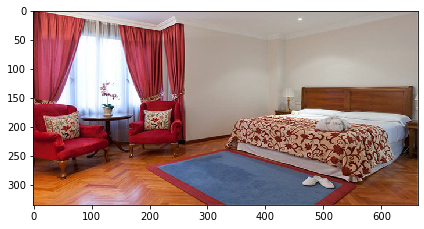

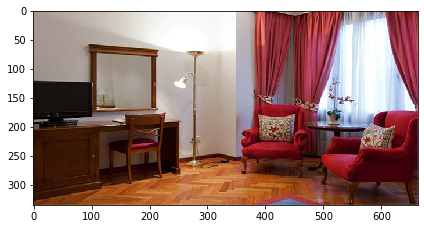

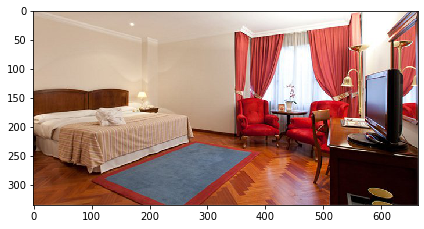

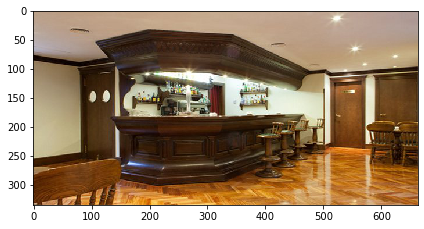

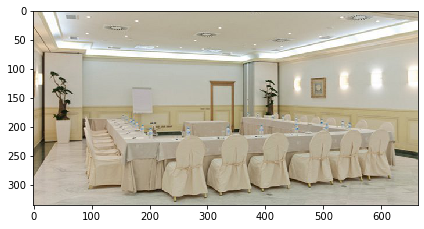

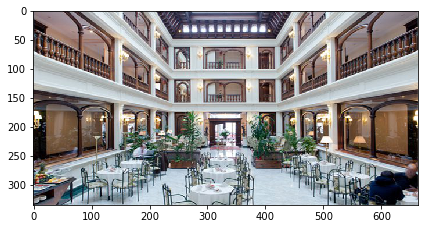

¿Desea ver más alojamientos? (s/n): n


In [132]:
lista_alojamientos = get_ListAlojamientos()

print_alojamientos(lista_alojamientos)
select = int(input("Seleccione un alojamiento (0 -> Salir): "))
    
while select > 0:
    if select > 0:
        clear()
        root=arbol.getroot()
        info_alojamiento=get_Info(lista_alojamientos[select-1], root)
        print("\n")
        print_info(info_alojamiento)
    
    select = input("¿Desea ver más alojamientos? (s/n): ").lower()
    
    if select == "s":
        clear()
        print_alojamientos(lista_alojamientos)
        select = int(input("Seleccione un alojamiento (0 -> Salir): "))
    else:
        select = 0

__Ejercicio 2 [3 puntos]__

Este ejercicio se pide crear un buscador sobre la información recuperada, de forma que el usuario podrá buscar alojamientos por diferentes criterios:

 * Tipo de alojamiento
 
 * Estrellas
 
Como resultado debería mostrarse un listado de todas los alojamientoss que cumplen las condiciones impuestas por el usuario. Se mostrará los nombres de los alojamientos. A continuación el usuario elegirá uno de los alojamientos y entonces se le mostrará  la misma información del alojamiento que en el ejercicio 1.  En caso de no existir un alojamiento con las condiciones dada, se mostrará un mensaje informativo.

Observar que habrá que preguntar al usuario por cada uno de los criterios, y éste tendrá que seleccionar un valor por cada criterio o no seleccionarlo. Después de mostrarle la información, se le volverá a preguntar si quiere seguir buscando. Entre las opciones del menú deberá existir una que sea para finalizar la búsqueda.

### __Ejercicio 3[2 puntos]__

Este ejercicio se pide crear un buscador de alojamiento por cercania a una calle indicada por el usuario. Para ello se usará la librería GeoPy que se usó en la práctica 2 y la información de latitud y longitud que aparece en el archivo xml de cada uno de los alojamientos. Se le preguntará al usuario que introduzca por teclado el nombre de la calle, el número y el código postal, y la distancia en kilómetros de cercania.
 
Como resultado debería mostrarse un listado de todas los alojamientoss que cumplen las condiciones impuestas por el usuario. Se mostrará los nombres de los alojamientos. A continuación el usuario elegirá uno de los alojamientos y entonces se le mostrará  la misma información del alojamiento que en el ejercicio 1.  En caso de no existir una alojamiento con las condiciones dada, se mostrará un mensaje informativo.

 Después de mostrarle la información, se le volverá a preguntar si quiere seguir buscando. Entre las opciones del menú deberá existir una que sea para finalizar la búsqueda.

Normas de entrega

   * Fecha tope de entrega: 07/10/2021
   * La entrega se realizará subiendo al campus virtual un notebook de Jupyter con la solución. El archivo tendrá como nombre FormatosII_GrupoX donde X será el número de grupo correspondiente.
